In [41]:
import pandas as pd
import scipy 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns 
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

In [16]:
data= pd.read_csv("elon_tweets.csv", sep=';')
data

,Unnamed: 0,tweet_id,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
0,0,1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531
1,1,1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257
2,2,1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030
3,3,1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826
4,4,1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18330,18330,1586057952678465537,2022-10-28,18:10:58,Twitter for iPhone,qam,@slashdot !,slashdot,1548,1611,31787,115238579,130,neutral,0.628496
18331,18331,1586057687782998017,2022-10-28,18:09:54,Twitter for iPhone,en,@skorusARK Cool!,skorusARK,1041,593,21339,115238579,130,positive,0.932170
18332,18332,1585981766229143552,2022-10-28,13:08:13,Twitter for iPhone,en,@WeAreCanProud First I’ve heard,WeAreCanProud,3213,3846,77864,115238579,130,neutral,0.758104
18333,18333,1585966869122457600,2022-10-28,12:09:02,Twitter for iPhone,en,🎶 let the good times roll 🎶,_,48131,94751,999337,115238579,130,positive,0.886272


In [17]:
data.drop(columns='Unnamed: 0', inplace=True)

In [18]:
data.set_index('tweet_id', inplace=True)

In [26]:
data.sort_values('date', ascending=False)

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1590519242805641216,2022-11-10,01:38:32,Twitter for iPhone,en,"@micsolana In days to come, we’ll add granular...",micsolana,348,133,1557,115241851,130,neutral,0.730545
1590505894210834434,2022-11-10,00:45:30,Twitter for iPhone,en,@micsolana We are changing the text to say “Le...,micsolana,1224,598,9464,115241851,130,neutral,0.587615
1590391902662455296,2022-11-09,17:12:32,Twitter for iPhone,en,@SciGuySpace Finally,SciGuySpace,464,275,7223,115241851,130,neutral,0.496665
1590398147968520192,2022-11-09,17:37:21,Twitter for iPhone,en,@lawrencekitema @SpaceNews_Inc Congratulations!,"lawrencekitema,SpaceNews_Inc",178,167,3831,115241851,130,positive,0.981080
1590392135395979265,2022-11-09,17:13:27,Twitter for iPhone,en,@SpaceNews_Inc Rockets that aren’t reusable ha...,SpaceNews_Inc,1756,1274,22648,115241851,130,negative,0.676390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142881284019060736,2011-12-03,08:22:07,Twitter for iPhone,en,That was a total non sequitur btw,_,27,9,50,107415763,122,negative,0.506732
142880871391838208,2011-12-03,08:20:28,Twitter for iPhone,en,"Great Voltaire quote, arguably better than Twa...",_,23,29,50,107415763,122,positive,0.558608
142179928203460608,2011-12-01,09:55:11,Twitter Web Client,en,Went to Iceland on Sat to ride bumper cars on ...,_,33,22,189,107415714,122,positive,0.973320


In [23]:
corr_num=data.corr()
corr_num

,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_val
reply_count,1.000000,0.731378,0.812238,0.184486,0.180346,-0.010279
retweet_count,0.731378,1.000000,0.920335,0.084760,0.090934,-0.017313
like_count,0.812238,0.920335,1.000000,0.134076,0.142448,-0.018899
follower_count,0.184486,0.084760,0.134076,1.000000,0.889305,-0.041047
friends_count,0.180346,0.090934,0.142448,0.889305,1.000000,-0.031335
sentiment_val,-0.010279,-0.017313,-0.018899,-0.041047,-0.031335,1.000000


<Axes: >

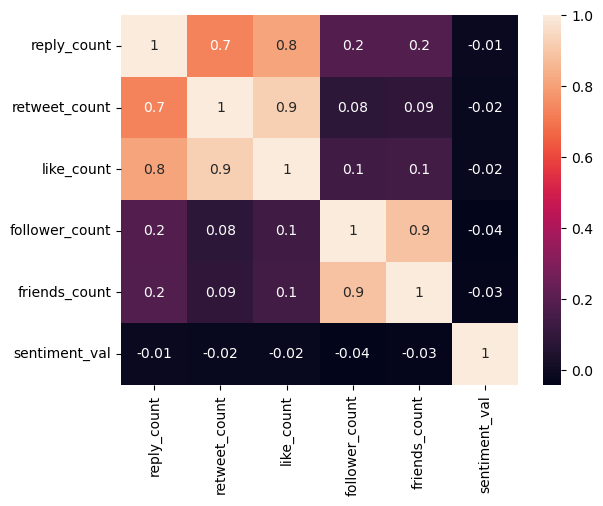

In [24]:
sns.heatmap(corr_num, annot=True, fmt='.1g',)

In [35]:
b=pd.DataFrame(data['date'].value_counts()).reset_index()
b.columns=["date", "tweet_count"]
bc= b.sort_values("date")
bc

,date,tweet_count
2198,2010-06-04,1
1742,2011-12-01,2
1786,2011-12-03,2
2201,2011-12-04,1
968,2011-12-21,7
...,...,...
1144,2022-11-06,6
20,2022-11-07,35
158,2022-11-08,20
148,2022-11-09,20


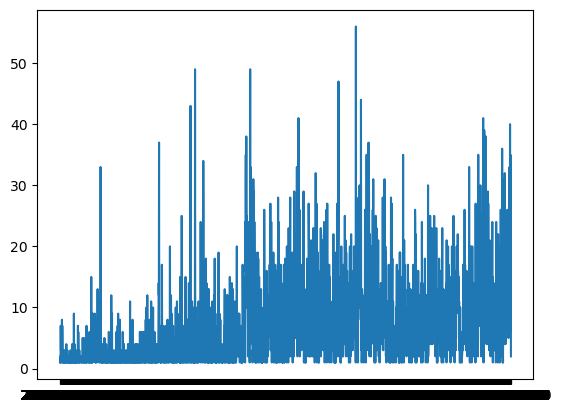

In [117]:
plt.plot(bc['date'],bc["tweet_count"])
plt.xlabel="Date"
plt.ylabel="Number of tweets"
plt.show()

In [52]:
data.head()

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531
1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257
1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030
1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826
1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709


In [58]:
data.describe(include='O')

,date,time_recoded,access_point,language,text,mentions,sentiment_cat
count,18335,18335,18335,18335,18335,18335,18335
unique,2569,16240,9,44,18104,8387,3
top,2020-04-16,18:05:28,Twitter for iPhone,en,@BillyM2k 🤣,_,neutral
freq,56,5,17773,15766,23,4488,10714


# Mention counts

In [59]:
mentions_counts=pd.DataFrame(data['mentions'].value_counts()).reset_index()
mentions_counts.columns=("Mentions", "Count")
mentions_counts

,Mentions,Count
0,_,4488
1,WholeMarsBlog,241
2,BillyM2k,141
3,teslaownersSV,136
4,PPathole,123
...,...,...
8382,"flcnhvy,Ford",1
8383,"lulusdave,Tesla",1
8384,CybertruckN,1
8385,hentesla,1


In [63]:
mentions_counts[['mention1', 'mention2']] = mentions_counts['Mentions'].str.split(',', 1, expand=True)
mentions_counts

,Mentions,Count,mention1,mention2
0,_,4488,_,None
1,WholeMarsBlog,241,WholeMarsBlog,None
2,BillyM2k,141,BillyM2k,None
3,teslaownersSV,136,teslaownersSV,None
4,PPathole,123,PPathole,None
...,...,...,...,...
8382,"flcnhvy,Ford",1,flcnhvy,Ford
8383,"lulusdave,Tesla",1,lulusdave,Tesla
8384,CybertruckN,1,CybertruckN,None
8385,hentesla,1,hentesla,None


In [67]:
mentions_counts[['mention2', 'mention3']] = mentions_counts['mention2'].str.split(',', 1, expand=True)
mentions_counts

,Mentions,Count,mention1,mention2,mention3
0,_,4488,_,None,None
1,WholeMarsBlog,241,WholeMarsBlog,None,None
2,BillyM2k,141,BillyM2k,None,None
3,teslaownersSV,136,teslaownersSV,None,None
4,PPathole,123,PPathole,None,None
...,...,...,...,...,...
8382,"flcnhvy,Ford",1,flcnhvy,Ford,None
8383,"lulusdave,Tesla",1,lulusdave,Tesla,None
8384,CybertruckN,1,CybertruckN,None,None
8385,hentesla,1,hentesla,None,None


In [69]:
mentions_counts[['mention3', 'mention4']] = mentions_counts['mention3'].str.split(',', 1, expand=True)
mentions_counts

,Mentions,Count,mention1,mention2,mention3,mention4
0,_,4488,_,None,None,None
1,WholeMarsBlog,241,WholeMarsBlog,None,None,None
2,BillyM2k,141,BillyM2k,None,None,None
3,teslaownersSV,136,teslaownersSV,None,None,None
4,PPathole,123,PPathole,None,None,None
...,...,...,...,...,...,...
8382,"flcnhvy,Ford",1,flcnhvy,Ford,None,None
8383,"lulusdave,Tesla",1,lulusdave,Tesla,None,None
8384,CybertruckN,1,CybertruckN,None,None,None
8385,hentesla,1,hentesla,None,None,None


In [73]:
mentions_counts[['mention4', 'mention5']] = mentions_counts['mention4'].str.split(',', 1, expand=True)
mentions_counts

,Mentions,Count,mention1,mention2,mention3,mention4,mention5
0,_,4488,_,None,None,None,None
1,WholeMarsBlog,241,WholeMarsBlog,None,None,None,None
2,BillyM2k,141,BillyM2k,None,None,None,None
3,teslaownersSV,136,teslaownersSV,None,None,None,None
4,PPathole,123,PPathole,None,None,None,None
...,...,...,...,...,...,...,...
8382,"flcnhvy,Ford",1,flcnhvy,Ford,None,None,None
8383,"lulusdave,Tesla",1,lulusdave,Tesla,None,None,None
8384,CybertruckN,1,CybertruckN,None,None,None,None
8385,hentesla,1,hentesla,None,None,None,None


In [78]:
mentions_counts[['mention5', 'mention6']] = mentions_counts['mention5'].str.split(',', 1, expand=True)

ValueError: Columns must be same length as key

In [76]:
mentions_counts.isna().sum()
# Keeping the 6 mentions (8036 empty in the last column, out of 8387)

Mentions       0
Count          0
mention1       0
mention2    3207
mention3    5945
mention4    7191
mention5    7771
mention6    8036
dtype: int64

In [72]:
len(mentions_counts["Mentions"])

8387

In [79]:
mentions_counts

,Mentions,Count,mention1,mention2,mention3,mention4,mention5,mention6
0,_,4488,_,None,None,None,None,None
1,WholeMarsBlog,241,WholeMarsBlog,None,None,None,None,None
2,BillyM2k,141,BillyM2k,None,None,None,None,None
3,teslaownersSV,136,teslaownersSV,None,None,None,None,None
4,PPathole,123,PPathole,None,None,None,None,None
...,...,...,...,...,...,...,...,...
8382,"flcnhvy,Ford",1,flcnhvy,Ford,None,None,None,None
8383,"lulusdave,Tesla",1,lulusdave,Tesla,None,None,None,None
8384,CybertruckN,1,CybertruckN,None,None,None,None,None
8385,hentesla,1,hentesla,None,None,None,None,None


In [92]:
df2=mentions_counts[['mention2','Count']]
df2.columns=["mention", "count"]
df3=mentions_counts[['mention3','Count']]
df3.columns=["mention", "count"]
df4=mentions_counts[['mention4','Count']]
df4.columns=["mention", "count"]
df5=mentions_counts[['mention5','Count']]
df5.columns=["mention", "count"]
df6=mentions_counts[['mention6','Count']]
df6.columns=["mention", "count"]

In [94]:
mentions_counts.drop(columns=["Mentions", "mention2", "mention3", "mention4", "mention5", "mention6"], inplace=True)

In [97]:
mentions_counts

,Count,mention1
0,4488,_
1,241,WholeMarsBlog
2,141,BillyM2k
3,136,teslaownersSV
4,123,PPathole
...,...,...
8382,1,flcnhvy
8383,1,lulusdave
8384,1,CybertruckN
8385,1,hentesla


In [98]:
df1=mentions_counts[['mention1','Count']]
df1.columns=["mention", "count"]

In [101]:
mentionsdf=pd.concat([df1, df2, df3, df4, df5, df6])
mentionsdf.sort_values(('count'), ascending=False)

,mention,count
0,_,4488
0,None,4488
0,None,4488
0,None,4488
0,None,4488
...,...,...
2190,None,1
2191,None,1
2192,None,1
2193,Pflax1,1


In [106]:
groupedM=mentionsdf.groupby('mention').agg('sum')

In [112]:
gm2=groupedM.reset_index().sort_values('count', ascending=False)

In [118]:
topmentions=gm2.iloc[1:101]
topmentions

,mention,count
3021,Tesla,816
1034,Erdayastronaut,684
2835,SpaceX,653
2324,PPathole,491
6317,teslaownersSV,475
...,...,...
3108,TheBabylonBee,33
3408,WhatsupFranks,32
597,CathieDWood,32
1502,Jason,31


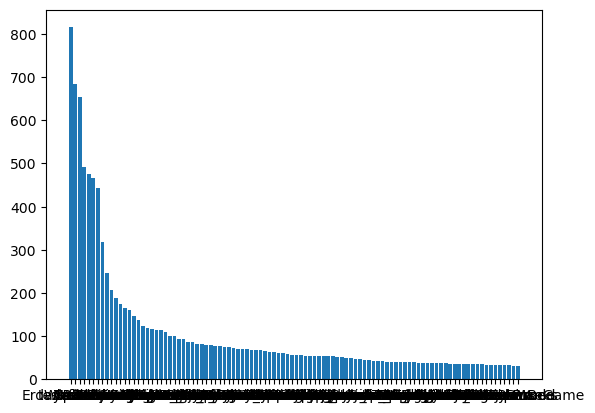

In [119]:
plt.bar(topmentions['mention'],topmentions['count'] )
plt.show()

In [124]:
toptopmentions=gm2.iloc[1:24]
toptopmentions

,mention,count
3021,Tesla,816
1034,Erdayastronaut,684
2835,SpaceX,653
2324,PPathole,491
6317,teslaownersSV,475
4474,flcnhvy,466
3410,WholeMarsBlog,443
3091,Teslarati,319
428,BillyM2k,246
2149,NASASpaceflight,206


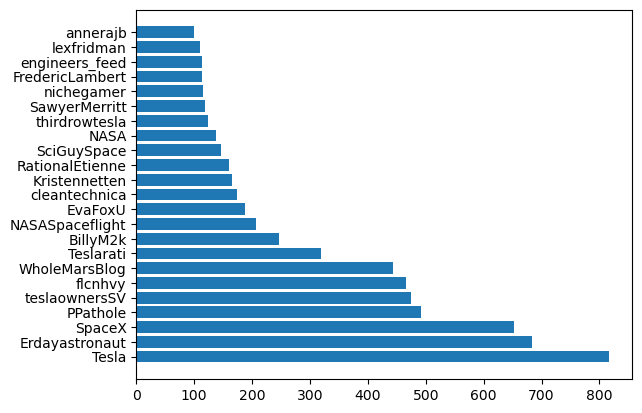

In [129]:
plt.barh(toptopmentions['mention'],toptopmentions['count'])
plt.show()

In [131]:
list_most_mentioned=list(toptopmentions['mention'])
list_most_mentioned

['Tesla',
 'Erdayastronaut',
 'SpaceX',
 'PPathole',
 'teslaownersSV',
 'flcnhvy',
 'WholeMarsBlog',
 'Teslarati',
 'BillyM2k',
 'NASASpaceflight',
 'EvaFoxU',
 'cleantechnica',
 'Kristennetten',
 'RationalEtienne',
 'SciGuySpace',
 'NASA',
 'thirdrowtesla',
 'SawyerMerritt',
 'nichegamer',
 'FredericLambert',
 'engineers_feed',
 'lexfridman',
 'annerajb']

In [132]:
data

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531
1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257
1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030
1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826
1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586057952678465537,2022-10-28,18:10:58,Twitter for iPhone,qam,@slashdot !,slashdot,1548,1611,31787,115238579,130,neutral,0.628496
1586057687782998017,2022-10-28,18:09:54,Twitter for iPhone,en,@skorusARK Cool!,skorusARK,1041,593,21339,115238579,130,positive,0.932170
1585981766229143552,2022-10-28,13:08:13,Twitter for iPhone,en,@WeAreCanProud First I’ve heard,WeAreCanProud,3213,3846,77864,115238579,130,neutral,0.758104


In [134]:
replies=pd.DataFrame(data['reply_count'].value_counts()).reset_index()
replies.columns=["replies", "count"]
rp= replies.sort_values("count")
rp

,replies,count
1977,10220,1
2629,1636,1
2630,1775,1
2631,1338,1
2632,5150,1
...,...,...
4,38,84
3,27,85
2,36,87
1,12,88


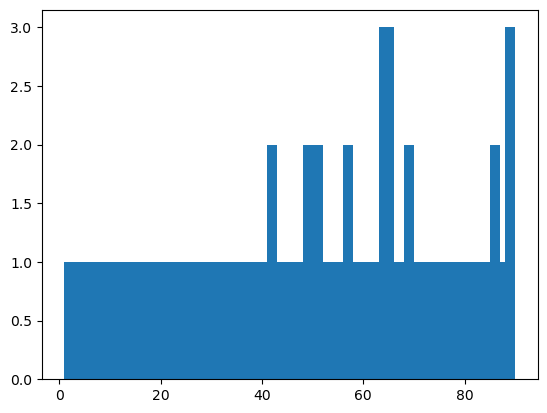

In [135]:
plt.hist(rp['replies'],rp["count"])
plt.xlabel="Replies average"
plt.ylabel="count"
plt.show()